# MSRP: Lab 02 Ordinary Differential Equations

In [10]:
# Load Packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pylab as p

## Exercise 1: Exponential Growth/Decay Model

The exponential decay model is defined by the following equation:

<h2><center>$ Y=N_{0}e^{kt} $</center></h2>

Where **$N_{0}$** is the initial population and **k** is some growth parameter.

The corresponding differential equation is $dN/dt = kN$

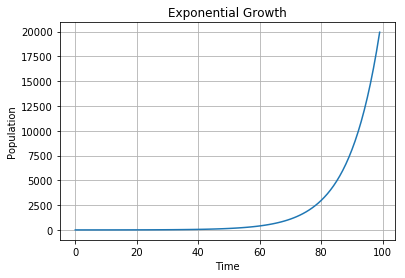

In [61]:
def exp_model(n,t0,K):
    dY = n[0] * K
    return [dY]
    

n = [1]
params = (.1,)   
times=range(0,100)

out = odeint(
    func=exp_model,y0=n,
    t=times,args=params
    )
 
plt.plot(out)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Exponential Growth')
plt.show()

The growth parameter determines the steepness of the curve and whether or not the function grows or decays. For values of k > 0 the function demonstrates growth while negative values of K exhibit decay. Large positive or negative values result in a steep transition in the graph. The difficult part of this problem was understanding how the differential equation works with the 'odeint' function. From reading the docs, etc., I now understand that ODEINT takes in a differential equation and integrates the function using a discrete number of timesteps. Since the delta values are computed in small steps rather than instantaneously there is some error in the model. The resolution of time effects the overall accuracy of the simulation. 

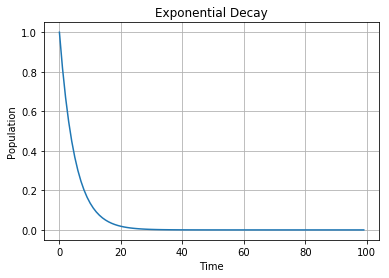

In [77]:
def exp_model(n,t0,K):
    dY = n[0] * K
    return [dY]
    

n = [1]
params = (-.2,)   
times=range(0,100)

out = odeint(
    func=exp_model,y0=n,
    t=times,args=params
    )
 
plt.plot(out)
plt.grid()
p.xlabel('Time')
p.ylabel('Population')
p.title('Exponential Decay')
plt.show()

With K set to -.2 the result is a mirror image to the growth model that indicates a rapid decline in population. 

## Exercise 2: Logistic Growth Model

The Logistic Growth model is defined by the following differential equation:

<h1><center>$ dN/dt = rN(1-N/K) $</center></h1>

Where **r** is a growth constant, **N** is the initial population and **K** is the carrying capacity.


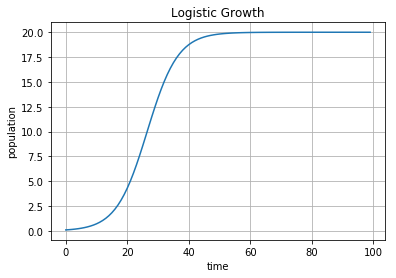

In [75]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def model(n,t0,r,K):
    dN = n[0] * r* (1 - n[0] / float(K))
    return [dN] 
    

n = [.1]
params = (.2, 20)   
times=range(0,100)

out = odeint(
    func=model,y0=n,
    t=times,args=params
    )
 
plt.plot(out)
plt.grid()
p.xlabel('time')
p.ylabel('population')
p.title('Logistic Growth')
plt.show()

The K value is the upper bound for the population and the r value determines how quickly the population reaches this max value. As r increases, the steepness increases and the transition from the initial value to the capacity value is nearly instantaneous.

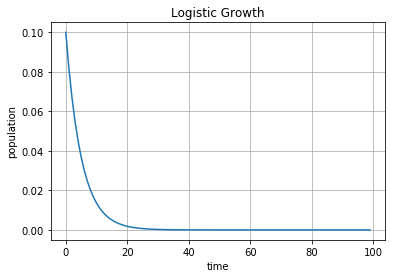

In [51]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def model(n,t0,r,K):
    dN = n[0] * r* (1 - n[0] / float(K))
    return [dN] 
    

n = [.1]

params = (-.2, 30)   
times=range(0,100)

out = odeint(
    func=model,y0=n,
    t=times,args=params
    )
 
plt.plot(out)
plt.grid()
p.xlabel('time')
p.ylabel('population')
p.title('Logistic Growth')
plt.show()

When the growth constant is negative, the population (fairly intuitively) goes to 0. 

## Exercise 3: Lotka-Volterra Predator-Prey Model

The Lotka-Volterra Predator-Prey model is defined by a 2 differential equations. The first is the change in the predator population with respect to time and the second is the change in prey poplation with respect to time. These two interconnected rates produce the same behavior as predator-prey populations observed in nature. 

<h2><center>$ du/dt = au-buv $</center><h2> 
<h2><center>$ dv/dt = -cv + dbu*v $</center><h2>

Where U is the population of Prey and V is the population of Predators. a,b,c and d are parameters that represent prey growth rate, death due to predation, death due to starvation and the food source needed for predators to reproduce, respectively. Varying the parameters can result in stable cycles or population extinctions depending on a particular configuration.  

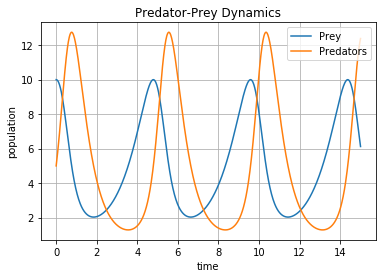

In [81]:
# Definition of parameters
a = 1.
b = .2
c = 2
d = 2

def dX_dt(X, t=0):
    dprey = a*X[0] -   b*X[0]*X[1]
    dpred = -c*X[1] + d*b*X[0]*X[1]  

    return np.array([dprey, dpred])


t = np.linspace(0, 15,  1000)              
X0 = np.array([10, 5])
X = odeint(dX_dt, X0, t)



prey, predators = X.T
f1 = p.figure()
p.plot(t, prey, label='Prey')
p.plot(t, predators  ,  label='Predators')
p.grid()
p.legend()
p.xlabel('time')
p.ylabel('population')
p.title('Predator-Prey Dynamics')
p.show()

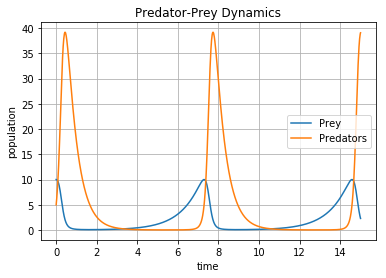

In [84]:
# Definition of parameters
a = 1.
b = .2
c = 2
d = 5

def dX_dt(X, t=0):
    dprey = a*X[0] -   b*X[0]*X[1]
    dpred = -c*X[1] + d*b*X[0]*X[1]  

    return np.array([dprey, dpred])


t = np.linspace(0, 15,  1000)              
X0 = np.array([10, 5])
X = odeint(dX_dt, X0, t)



prey, predators = X.T
f1 = p.figure()
p.plot(t, prey, label='Prey')
p.plot(t, predators  ,  label='Predators')
p.grid()
p.legend()
p.xlabel('time')
p.ylabel('population')
p.title('Predator-Prey Dynamics')
p.show()

Here is an example where the model does not follow our intuitions about how the real system work. After a population goes to zero it would not rebound in nature although mathematically, this is perfectly admissible.

As someone who has not taken differential equations I found the most challenging part of the assignment to be building a strong understanding of what the math is telling me. After spending some time pondering what makes a differential equation special I think I am beginning to understand better. It is very powerful to understand the evolution a system in terms of rates of change and sets of parameter values. The result of this is a very rich model that can simulate the evolution of a system over time under various starting conditions. Since many differential equations are too difficult to solve analytically, computational tools can be used to approximate the solution numerically.  